<a href="https://colab.research.google.com/github/josooik/DeepLearning/blob/main/8_TF_app_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전이학습

## 텐서플로우 applications를 이용한 전이학습

[https://www.tensorflow.org/api_docs/python/tf/keras/applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications)

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras import layers, Model

### 데이터

In [2]:
from tensorflow.keras import datasets, utils

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# 데이터 전처리 x : minmax min0,  max255 -> x / 255
x_train, x_test = x_train / 255, x_test / 255

# 데이터 전처리 y : categorical
y_train = utils.to_categorical(y_train, num_classes=10)
y_test = utils.to_categorical(y_test, num_classes=10)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

170508288/170498071 [==============================] - 6s 0us/step


((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

### 모델 구현

* 모델 불러오기

In [3]:
base_model = applications.vgg16.VGG16(weights='imagenet',
                                      include_top=False, # 마지막 레이어
                                      input_shape=[32, 32, 3])
base_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

* 모델 조합하기

In [4]:
from tensorflow.keras import layers, models

x = base_model.output
y = layers.Flatten(name='Add_flatten')(x)
#y = layers.Dense(128, activation='relu')(y)
y = layers.Dense(10, activation='softmax', name='Add_dense')(y)

model = models.Model(inputs=base_model.input, outputs = y)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

* 컴파일

In [5]:
# base model의 weight들은 학습을 안하고싶다!

for i in range(19):
  print(i, model.layers[i])
  model.layers[i].trainable = False

0 <keras.engine.input_layer.InputLayer object at 0x7f551d62b950>
1 <keras.layers.convolutional.Conv2D object at 0x7f551df92590>
2 <keras.layers.convolutional.Conv2D object at 0x7f551ce23d50>
3 <keras.layers.pooling.MaxPooling2D object at 0x7f551c23df90>
4 <keras.layers.convolutional.Conv2D object at 0x7f551c26e7d0>
5 <keras.layers.convolutional.Conv2D object at 0x7f55104c3d90>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f55104c9790>
7 <keras.layers.convolutional.Conv2D object at 0x7f55104cdf10>
8 <keras.layers.convolutional.Conv2D object at 0x7f55104d6690>
9 <keras.layers.convolutional.Conv2D object at 0x7f55104cdd50>
10 <keras.layers.pooling.MaxPooling2D object at 0x7f55104e2110>
11 <keras.layers.convolutional.Conv2D object at 0x7f55104e6890>
12 <keras.layers.convolutional.Conv2D object at 0x7f551ddb8690>
13 <keras.layers.convolutional.Conv2D object at 0x7f551c2f3d50>
14 <keras.layers.pooling.MaxPooling2D object at 0x7f55104c9b50>
15 <keras.layers.convolutional.Conv2D object at 

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

### 학습

In [7]:
history = model.fit(x_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
3125/3125 [==============================] - 75s 15ms/step - loss: 1.4776 - acc: 0.4963
Epoch 2/20
3125/3125 [==============================] - 46s 15ms/step - loss: 1.2748 - acc: 0.5628
Epoch 3/20
3125/3125 [==============================] - 46s 15ms/step - loss: 1.2231 - acc: 0.5806
Epoch 4/20
3125/3125 [==============================] - 46s 15ms/step - loss: 1.1944 - acc: 0.5892
Epoch 5/20
3125/3125 [==============================] - 46s 15ms/step - loss: 1.1766 - acc: 0.5955
Epoch 6/20
3125/3125 [==============================] - 46s 15ms/step - loss: 1.1630 - acc: 0.5995
Epoch 7/20
3125/3125 [==============================] - 46s 15ms/step - loss: 1.1538 - acc: 0.6031
Epoch 8/20
3125/3125 [==============================] - 46s 15ms/step - loss: 1.1462 - acc: 0.6037
Epoch 9/20
3125/3125 [==============================] - 46s 15ms/step - loss: 1.1399 - acc: 0.6064
Epoch 10/20
3125/3125 [==============================] - 46s 15ms/step - loss: 1.1354 - acc: 0.6066
Epoch 11/

### 평가

In [8]:
# eavluate : 성능 평가 test셋을 평가할때, test의 y(label이 있으면)
# predict : label 없을때 / 값 예측하고싶을때

model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.1999 - acc: 0.5826


[1.1998920440673828, 0.5825999975204468]

* 시각화

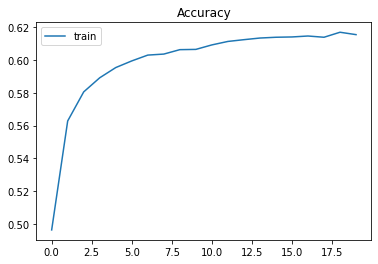

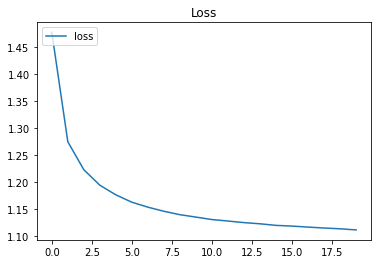

In [10]:
import matplotlib.pyplot as plt
# loss : 훈련 손실값
# acc : 훈련 정확도
# val_loss : 검증 손실값
# val_acc : 검증 정확도

plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['loss'], loc='upper left')
plt.show()